<a href="https://colab.research.google.com/github/Abhinav9512/Event-Detection-from-Seismic-waves/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSV File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Waveform

Text(0.5, 1.0, 'Waveform')

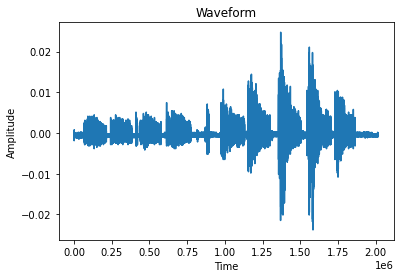

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/CSV files/sensor_a_6_march.csv", header=None, skiprows=10)

df = df.values[:,1]
plt.plot(df)

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform')


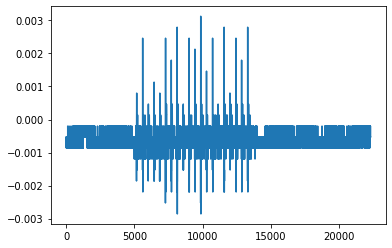

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = "/content/drive/MyDrive/CSV files/"
file_name = "sensor_a_6_march.csv"
dfNoise = pd.read_csv(csv_file_path+file_name,header=None,skiprows=10)
dfNoise = dfNoise.values[63000:85300,1]

plt.plot(dfNoise)

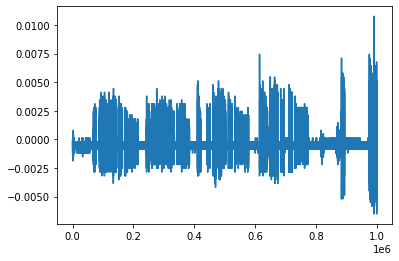

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = "/content/drive/MyDrive/CSV files/"
file_name = "sensor_a_6_march.csv"
df = pd.read_csv(csv_file_path+file_name,header=None,skiprows=10)
df = df.values[0:1000000,1]

plt.plot(df)

Amplitude Thresholding Based Event Detection

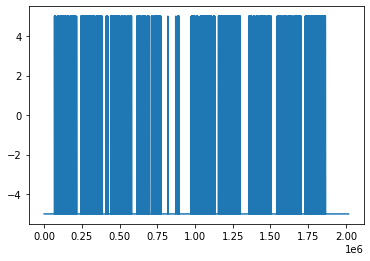

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/CSV files/sensor_a_6_march.csv", header=None, skiprows=10)
df["AmpThres"] =  -5.0     # Default value is -5.0 if there is event then it will be 5.0.
df["StartingTime"] = 0.0   # For storing starting time
df["EndingTime"] = 0.0     # For storing ending time
        
x = len(df.values[:,0])         # number of readings
y = df.values[:,1]         #Voltage

def ampThresBasedEventDetection (signalLength, amp):

  t = 0           # For storing time index
  ind = 0         # To store starting time index of event
  flag = 0        # To store ending time index of event

  while t < signalLength:

    if abs(amp[t]) > 0.002:
      df.values[t,2] = 5.0
      if flag == ind :
        df.values[ind,3] = t        # To store starting time of event
        flag = flag + 1  

    if abs(amp[t-1]) > 0.002 and  abs(amp[t])< 0.002 :
      df.values[ind,4] = t - 1      # To store ending time of event
      ind = ind + 1
      
    t=t+1
  
ampThresBasedEventDetection(x,y)

ampThres = df.values[:,2]

plt.plot(ampThres)

df.to_csv('/content/drive/MyDrive/CSV files/ampthreshold.csv', index=False)     # To store events

Kurtosis Based Event Detection


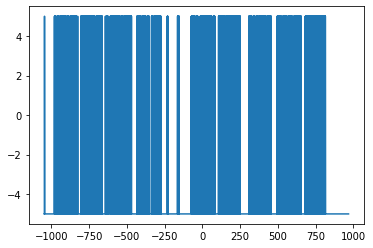

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import kurtosis

df = pd.read_csv("/content/drive/MyDrive/CSV files/sensor_a_6_march.csv", header=None, skiprows=10)

df["Kurtosis"] = -5.0      # Default value is -5.0 if there is event then it will be 5.0.
df["StartingTime"] = 0.0   # For storing starting time
df["EndingTime"] = 0.0     # For storing ending time
        
x = len(df.values[:,0])         #Number of readings
y = df.values[:,1]         #Voltage

windowLength = 200

def kurtosisBasedEventDetection (signalLength, amp):

  t = windowLength           # For storing time index
  ind = 0                    # To store starting time index of event
  flag = 0                   # To store ending time index of event

  while t < signalLength - windowLength :
    kts = kurtosis(amp[t-windowLength:t])

    if kts > 6:
      df.values[t,2] = 5.0
      if flag == ind :
        df.values[ind,3] = t     # To store starting time of event
        flag = flag + 1 

    if df.values[t-1,2] > 6 and df.values[t,2] < 6 :
      df.values[ind,4] = t - 1   # To store ending time of event
      ind = ind + 1
    t=t+1
  
kurtosisBasedEventDetection(x,y)

kurtosisValues = df.values[:,2]

plt.plot(df.values[:,0],kurtosisValues)
df.to_csv('/content/drive/MyDrive/CSV files/kurtosis.csv', index=False)         # To store events

STA/LTA

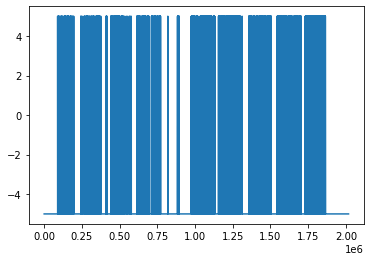

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/CSV files/sensor_a_6_march.csv", header=None, skiprows=10)
df["staLta"] = -5.0           # Default value is -5.0 if there is event then it will be 5.0.
df["startingTime"] = 0.0      # For storing starting time
df["endingTime"] = 0.0        # For storing ending time

x = len(df.values[:,0])     #Signal Length
y = df.values[:,1]          #Voltage

shortTermWindow = 25
longTermWindow = shortTermWindow * 5

def stalta (signalLength, amp):
  i = longTermWindow + shortTermWindow
  ind = 0                    # To store starting time index of event
  flag = 0                   # To store ending time index of event

  while i < signalLength  :
    sta = 0.0
    lta = 0.0
    n1 = i-shortTermWindow
    n2 = i-longTermWindow-shortTermWindow
    
    while n1 < i :
      sta = sta + ((amp[n1]*amp[n1])/shortTermWindow)
      n1 = n1 + 1 
    
    while n2 < i - shortTermWindow:
      lta = lta + ((amp[n2]*amp[n2])/longTermWindow)
      n2 = n2 + 1

    ratio = sta/lta
    
    if ratio > 10:
      df.values[i,2] = 5.0

      if flag == ind :
        df.values[ind,3] = i
        flag = flag + 1
    
    if df.values[i-1,2] > 10 and df.values[i,2] < 10 :
      df.values[ind,4] = i - 1
      ind = ind + 1

    i=i+1
stalta(x,y)

plt.plot(df.values[:,2])
df.to_csv('/content/drive/MyDrive/CSV files/sta_lta.csv', index=False)          # To store events

Modified Energy Ratio

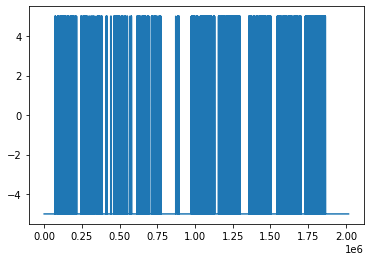

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/CSV files/sensor_a_6_march.csv", header=None, skiprows=10)
df["modifiedEnergyRatio"] = -5.0      # Default value is -5.0 if there is event then it will be 5.0.
df["startingTime"] = 0.0              # For storing starting time
df["endingTime"] = 0.0                # For storing ending time

x = len(df.values[:,0])
y = df.values[:,1]

L = 50

def modifiedEnergyRatio (signalLength, amp):
  i = L
  ind = 0                             # To store starting time index of event
  flag = 0                            # To store ending time index of event

  while i < signalLength - L:
    num = 0.0
    den = 0.0
    n1 = i-L
    n2 = i
    
    while n1 < i :
      num = num + (amp[n1]*amp[n1]) 
      n1 = n1 + 1 
      
    while n2 < i+L :
      den = den + (amp[n2]*amp[n2])
      n2 = n2 + 1
    
    ratio = (num/den)*abs(amp[i]*amp[i]*amp[i])
    
    if ratio > 0.00000002 :
      df.values[i,2] = 5.0

      if flag == ind :
        df.values[ind,3] = i
        flag = flag + 1
    
    if df.values[i-1,2] > 0.00000002 and df.values[i,2] < 0.00000002 :
      df.values[ind,4] = i - 1
      ind = ind + 1

    i=i+1
modifiedEnergyRatio(x,y)
plt.plot(df.values[:,2])
df.to_csv('/content/drive/MyDrive/CSV files/mer.csv', index=False)              # To store events

Algorithm 1 - Event Detection using STA/LTA

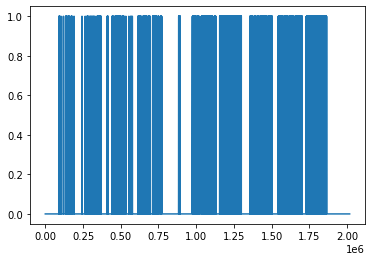

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/CSV files/sensor_a_6_march.csv", header=None, skiprows=10)
df["staLta"] = 0.0           # Default value is 0.0 if there is event then it will be 1.0.

x = len(df.values[:,0])     #Signal Length
y = df.values[:,1]          #Voltage

shortTermWindow = 25
longTermWindow = shortTermWindow * 5
overlappingFactor = 0.9

def stalta (signalLength, amp):
  i = 1
  K = math.floor(signalLength/(1 - overlappingFactor)*(shortTermWindow + longTermWindow))

  while i < K  :
    sta = 0.0
    lta = 0.0
    start = math.floor((1-overlappingFactor)*(shortTermWindow + longTermWindow))*(i-1) + 1
    stop = start + shortTermWindow + longTermWindow - 1
    lta_start = start
    lta_stop = lta_start + longTermWindow - 1
    sta_start = stop - shortTermWindow
    sta_stop = stop
    n1 = sta_start
    n2 = lta_start
    
    if stop >= signalLength :
      break;

    while n1 < sta_stop :
      sta = sta + ((amp[n1]*amp[n1])/shortTermWindow)
      n1 = n1 + 1 
    
    while n2 < lta_stop:
      lta = lta + ((amp[n2]*amp[n2])/longTermWindow)
      n2 = n2 + 1

    ratio = sta/lta
    
    if ratio > 10:
      df.values[start:stop,2] = 1.0

    i=i+1
stalta(x,y)

plt.plot(df.values[:,2])
df.to_csv('/content/drive/MyDrive/CSV files/sta_lta_1.csv', index=False)

Algorithm 2 - Event Extraction using Adaptive Thresholding